<a href="https://colab.research.google.com/github/lakshitachawla/lakshitachawla/blob/main/Smartphones_Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Dataset

In [ ]:
#Importing essential libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Uplaoding the dataset
df=pd.read_csv('/content/sample_data/Smartphones_Sales.csv') #Path
df #Displaying the Dataset

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
3109,POCO,M4 Pro 5G,Cool Blue,6 GB,128 GB,Yes,4.4,16999,19999,POCO M4 Pro 5G,3000,15.000750
3110,Nokia,225,Black,NaN,Expandable Upto 32 GB,Yes,3.6,3499,3499,Nokia 225,0,0.000000
3111,Apple,iPhone SE,White,2 GB,128 GB,Yes,4.5,44900,44900,Apple iPhone SE,0,0.000000
3112,Apple,iPhone 13 Pro,Gold,6 GB,128 GB,Yes,NaN,119900,119900,Apple iPhone 13 Pro,0,0.000000


# Understanding the Dataset

In [ ]:
#Displaying the first 8 rows of the dataset
df.head(8)

,Brands,Models,Colors,Memory,Storage,Camera,Rating,Selling Price,Original Price,Mobile,Discount,discount percentage
0,SAMSUNG,GALAXY M31S,Mirage Black,8 GB,128 GB,Yes,4.3,19330,20999,SAMSUNG GALAXY M31S,1669,7.947998
1,Nokia,3.2,Steel,2 GB,16 GB,Yes,3.8,10199,10199,Nokia 3.2,0,0.000000
2,realme,C2,Diamond Black,2 GB,NaN,Yes,4.4,6999,7999,realme C2,1000,12.501563
3,Infinix,Note 5,Ice Blue,4 GB,64 GB,Yes,4.2,12999,12999,Infinix Note 5,0,0.000000
4,Apple,iPhone 11,Black,4GB,64 GB,Yes,4.6,49900,49900,Apple iPhone 11,0,0.000000
5,GIONEE,L800,Black,8 MB,16 MB,Yes,4.0,2199,2199,GIONEE L800,0,0.000000
6,Apple,iPhone 13 Mini,Pink,6 GB,512 GB,Yes,NaN,99900,99900,Apple iPhone 13 Mini,0,0.000000
7,Apple,iPhone XR,Coral,3 GB,64 GB,Yes,4.6,42999,47900,Apple iPhone XR,4901,10.231733


In [ ]:
#Displaying the number of rows and columns in the dataset
df.shape

(3114, 12)

In [ ]:
#Multipling the number of rows and columns to calculate the total number of values in the dataset
df.shape[0]*df.shape[1]

37368

In [ ]:
#Displaying the column names and info about the null values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brands               3114 non-null   object 
 1   Models               3114 non-null   object 
 2   Colors               3114 non-null   object 
 3   Memory               3071 non-null   object 
 4   Storage              3075 non-null   object 
 5   Camera               3114 non-null   object 
 6   Rating               2970 non-null   float64
 7   Selling Price        3114 non-null   int64  
 8   Original Price       3114 non-null   int64  
 9   Mobile               3114 non-null   object 
 10  Discount             3114 non-null   int64  
 11  discount percentage  3114 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage: 292.1+ KB


In [ ]:
# Finding the count of null values in all the columns of the dataset.
df.isnull().sum().sort_values(ascending=False)

,0
Rating,144
Memory,43
Storage,39
Brands,0
Models,0
Colors,0
Camera,0
Selling Price,0
Original Price,0
Mobile,0


*In the dataset we have lot of null values in columns "Rating" and "Memory" which can impact further analysis of data, Hence we will work on these columns and perform data cleaning*

# Data Cleaning

In [ ]:
#Checking the Statistical Information of the dataset
df.describe()

,Rating,Selling Price,Original Price,Discount,discount percentage
count,2970.000000,3114.000000,3114.000000,3114.000000,3114.000000
mean,4.243098,26436.625562,28333.473025,1896.847463,6.086788
std,0.271991,30066.892622,31525.599889,5337.126176,11.106776
min,2.300000,1000.000000,1000.000000,-8000.000000,-160.320641
25%,4.100000,9990.000000,10030.250000,0.000000,0.000000
50%,4.300000,15000.000000,16889.500000,0.000000,0.000000
75%,4.400000,28999.000000,31500.000000,2000.000000,9.836388
max,5.000000,179900.000000,189999.000000,75000.000000,70.610305


In [ ]:
#Removing the unwanted columns of the dataset
df.drop(['Memory'], axis=1, inplace=True)

In [ ]:
#Displaying the columns of the dataset after removal of columns
df.head().T

,0,1,2,3,4
Brands,SAMSUNG,Nokia,realme,Infinix,Apple
Models,GALAXY M31S,3.2,C2,Note 5,iPhone 11
Colors,Mirage Black,Steel,Diamond Black,Ice Blue,Black
Storage,128 GB,16 GB,NaN,64 GB,64 GB
Camera,Yes,Yes,Yes,Yes,Yes
Rating,4.3,3.8,4.4,4.2,4.6
Selling Price,19330,10199,6999,12999,49900
Original Price,20999,10199,7999,12999,49900
Mobile,SAMSUNG GALAXY M31S,Nokia 3.2,realme C2,Infinix Note 5,Apple iPhone 11
Discount,1669,0,1000,0,0


In [ ]:
# Finding the count of null values in remaining columns.
df.isna().sum()

,0
Brands,0
Models,0
Colors,0
Storage,39
Camera,0
Rating,144
Selling Price,0
Original Price,0
Mobile,0
Discount,0


*As per the above information we have columns with nominal amount of null values. Thus to fix those values we will take median or mode as per the column data.*

In [ ]:
#The column "Rating" has numerical values. Thus, we use median method to fill the null values
#Finding the median of the column
df["Rating"].median()

4.3

In [ ]:
#Filling the null values of "Rating" with the median value.
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [ ]:
#Finding the remaining null values in the dataset
df.isna().sum()

,0
Brands,0
Models,0
Colors,0
Storage,39
Camera,0
Rating,0
Selling Price,0
Original Price,0
Mobile,0
Discount,0


# Representing the Data

*Making a histogram to represent the data values in each column*

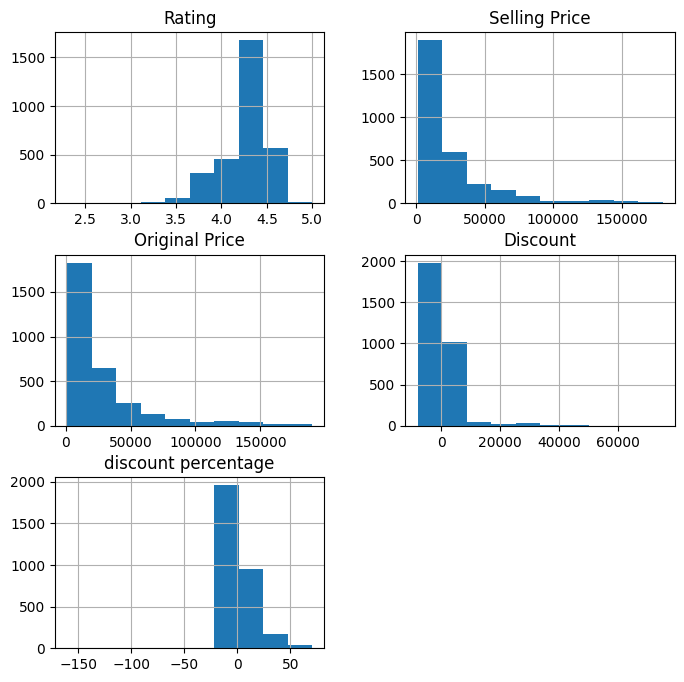

In [ ]:
# Plotting a graph to show a histogram for all the columns in the dataset
df.hist(figsize=(8,8))
plt.show()

# Handling Outliers

*Finding outliers in the Dataset*

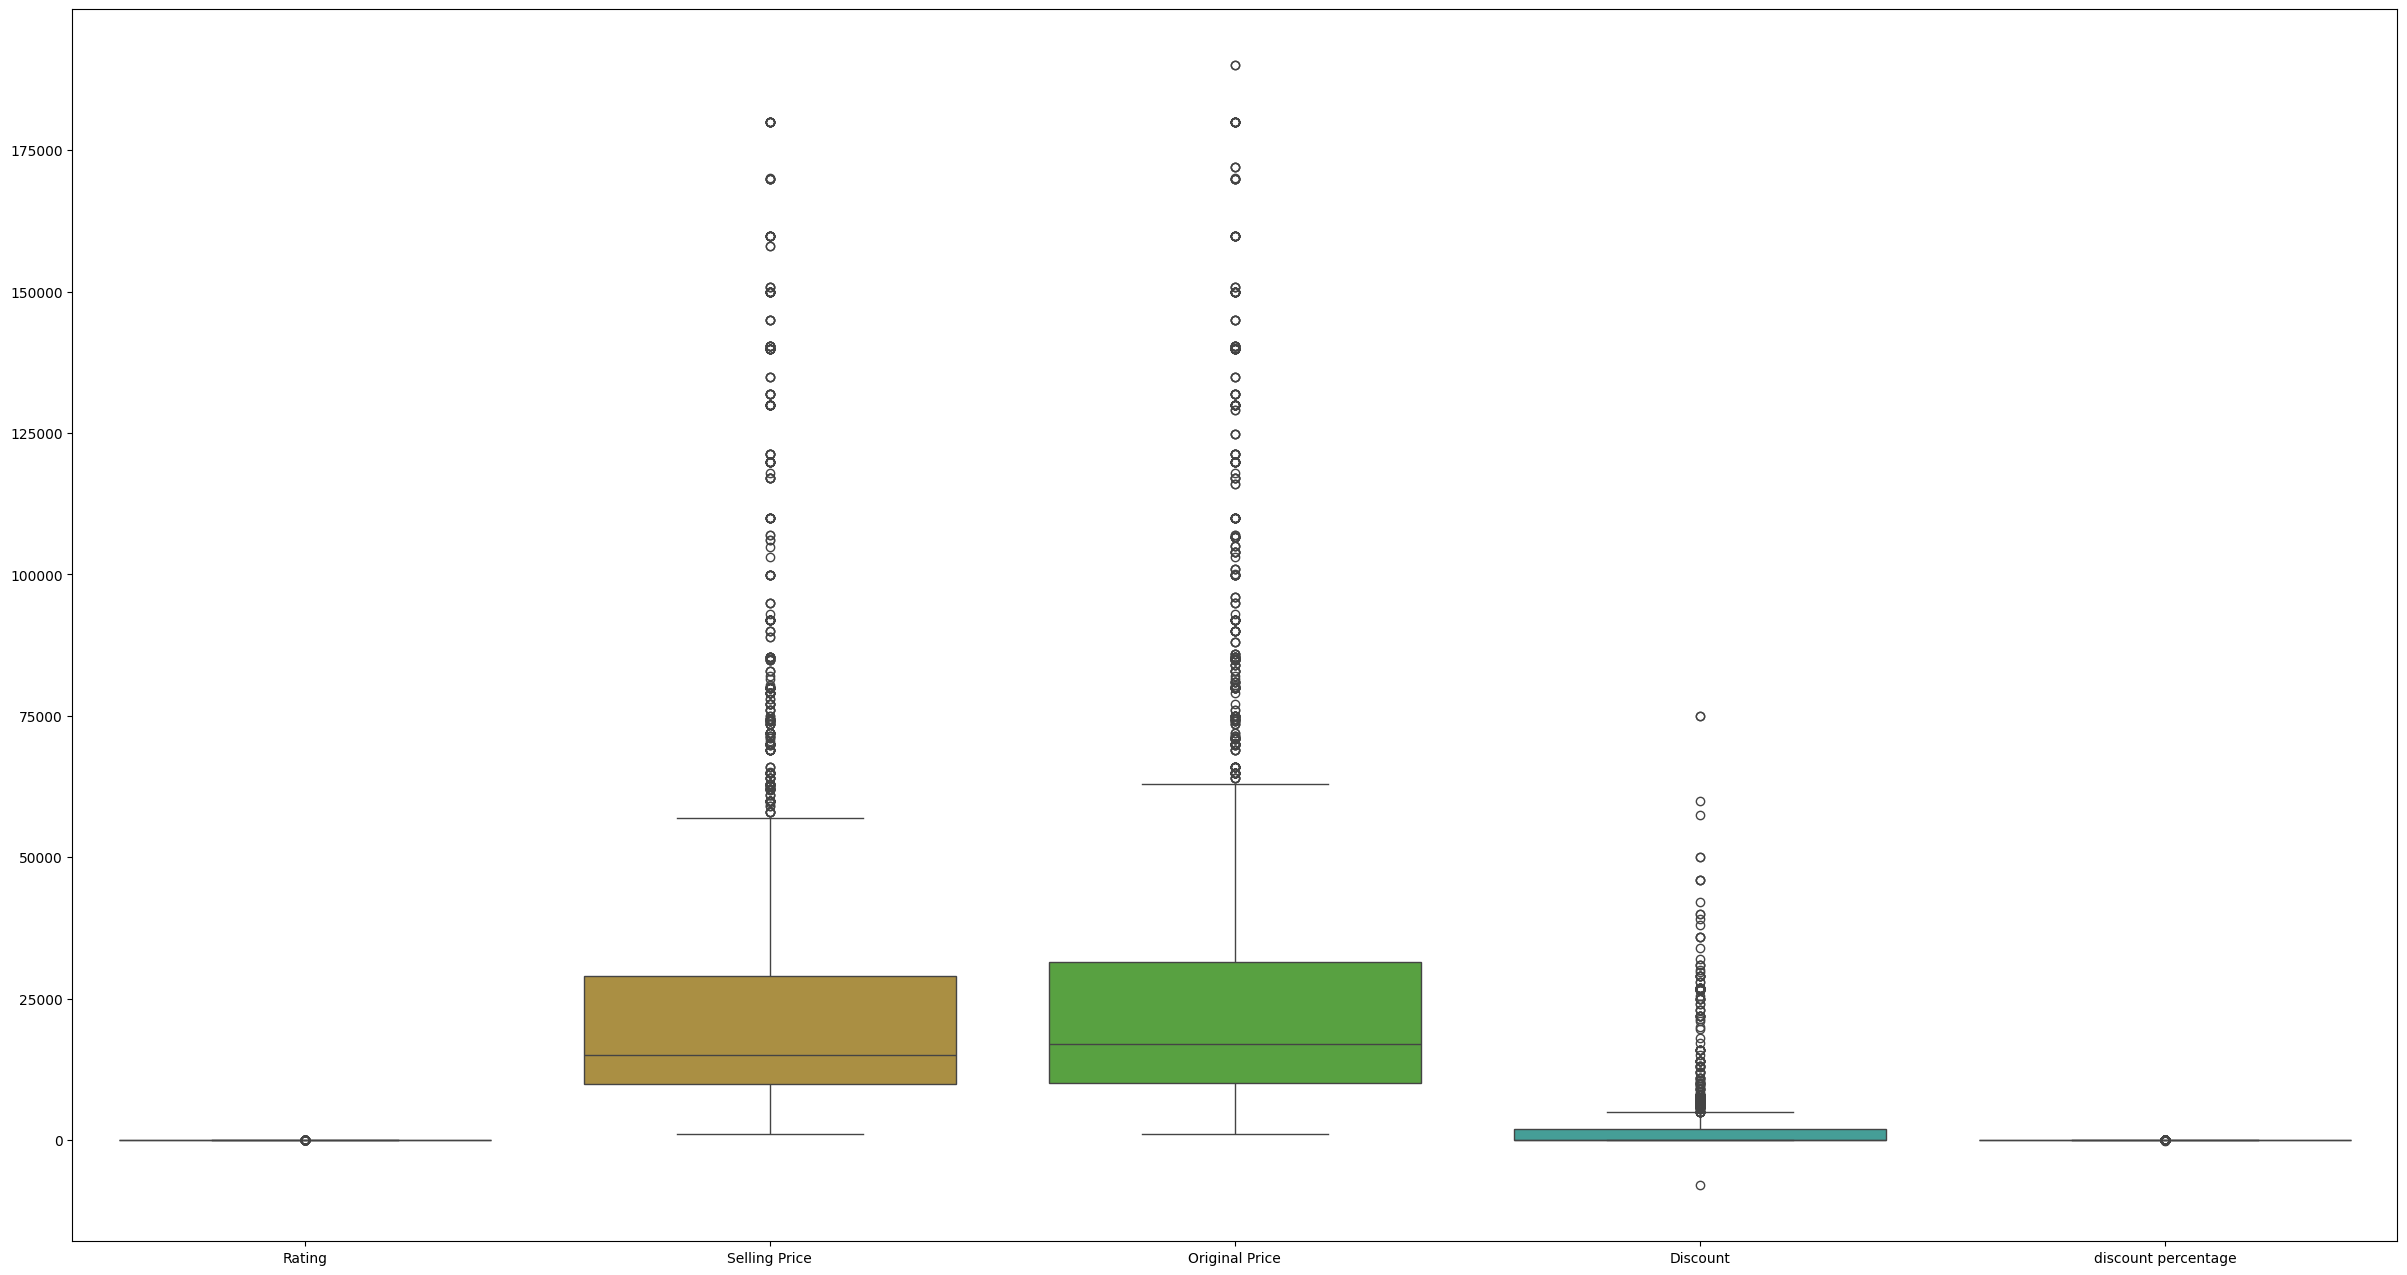

In [ ]:
# Plotting a boxplot to find out the outliers in each column
plt.figure(figsize=(30,16))
sns.boxplot(data=df[['Rating','Selling Price', 'Original Price','Discount','discount percentage']])
plt.show()

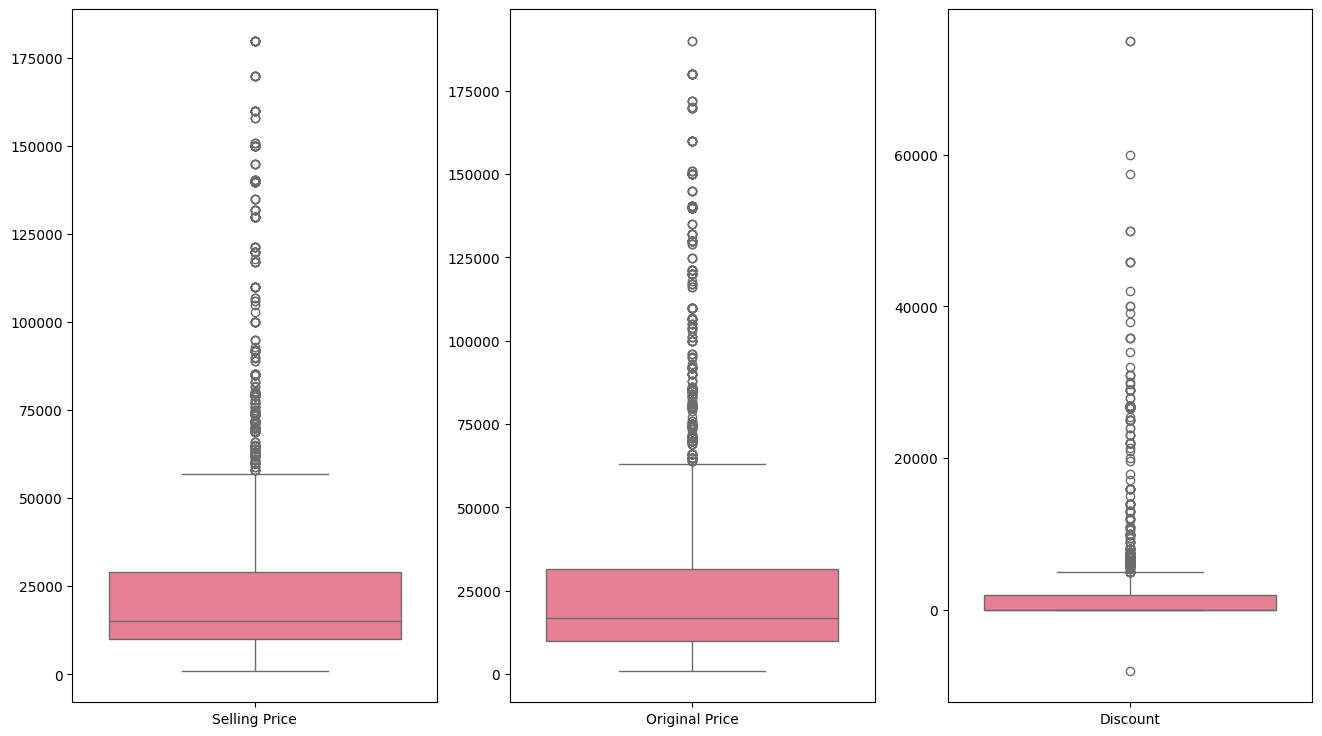

In [ ]:
#Changing the scale of graphs of certain columns for better visuals
fig, axes=plt.subplots(1,3, figsize=(16,9))
sns.set_palette('husl')
ax= sns.boxplot(data=df[['Selling Price']], ax=axes[0])
ax=sns.boxplot(data=df[['Original Price']], ax=axes[1])
ax= sns.boxplot(data=df[['Discount']], ax=axes[2])
plt.show()

*We can see a high amount of outliers in the columns Selling Price, Original Price and Discount*

In [ ]:
df["Rating"].median()

4.3

In [ ]:
df["Discount"].median()

0.0

In [ ]:
df["discount percentage"].median()

0.0

In [ ]:
#Creating a copy of the dataset to handle outliers
new_df = df.copy()

In [ ]:
#Removing outliers by standard method
for col in ['Selling Price','Original Price','Discount']:
  # Using IQR method and capping to define the range of inliners:
  lower_cap, q1, q3, upper_cap, median = df[col].quantile([0.01,0.25,0.75,0.99,0.5])
  lower_limit = q1 - 1.5*(q3-q1)
  upper_limit = q3 + 1.5*(q3-q1)

  # Replacing Outliers with median value and Capping
  new_df[col] = np.where(new_df[col] > upper_limit, median,np.where(
                         new_df[col] < lower_limit,median,np.where(
                         new_df[col] < lower_cap,lower_cap,np.where(
                         new_df[col] > upper_cap,upper_cap,new_df[col]))))

In [ ]:
numeric_features=['Selling Price','Original Price','Discount']

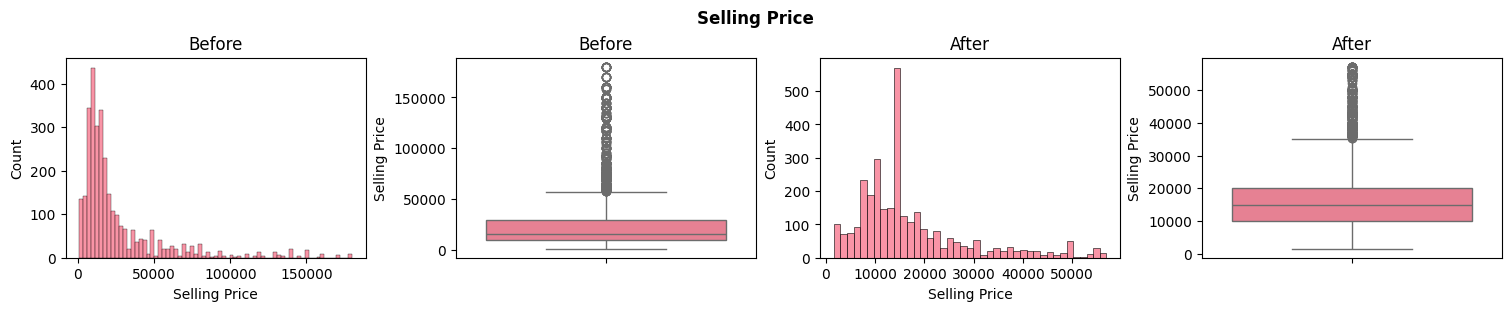

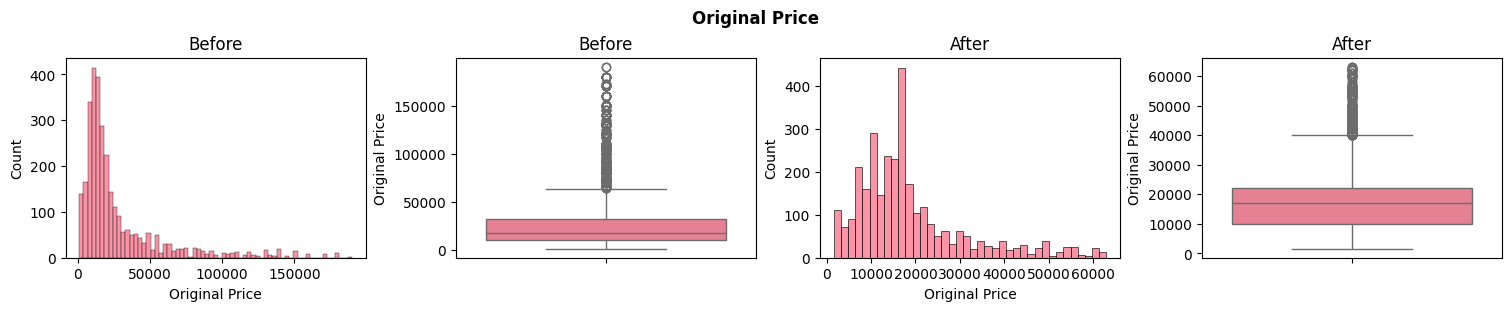

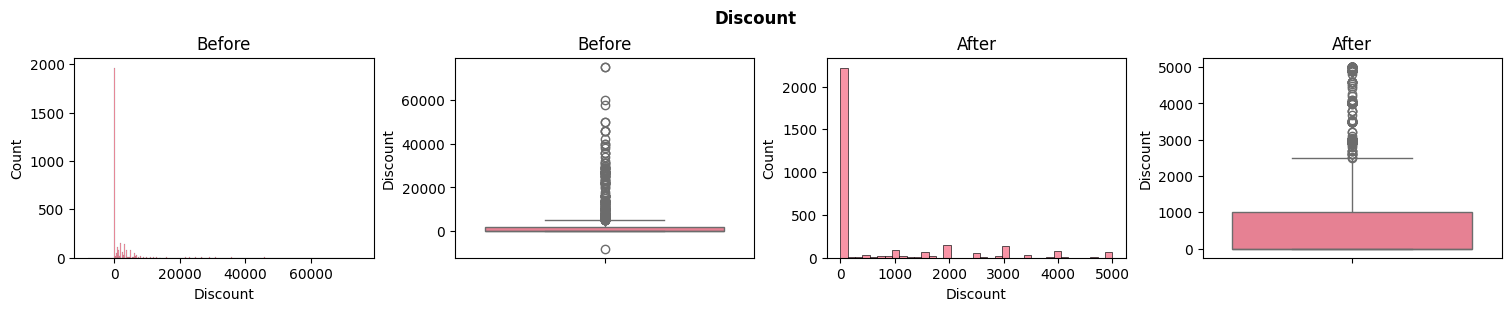

In [ ]:
#Plotting Graphs Before treating outliers
for col in numeric_features:
  fig, ax =plt.subplots(1,4, constrained_layout=True)
  fig.set_size_inches(15, 3)
  sns.histplot(df[col], ax=ax[0]).set(title="Before")
  sns.boxplot(df[col], ax=ax[1]).set(title="Before")

# After treating outliers
  sns.histplot(new_df[col], ax=ax[2]).set(title="After")
  sns.boxplot(new_df[col], ax=ax[3]).set(title="After")
  plt.suptitle(f'{col.title()}',weight='bold')
  fig.show()

# Data Manipualtion

In [ ]:
#Creating a new column 'Discounted Price' by subtracting two columns 'Selling Price' and 'Discount'.
new_df['Discounted Price']=new_df['Selling Price']-new_df['Discount']

In [ ]:
#Creating a new column 'Profit' by subtracting two columns 'Original Price' and 'Discounted Price'.
new_df['Profit']=new_df['Original Price']-new_df['Discounted Price']

# Data Analysation

Analysing dataset on the following basis:-


*   Distribution of Selling Prices for Smartphones
*   Variation of Rating on the Basis of Selling Price
*   Average Selling Price by Brand
*   Distribution of Smartphones by Brand
*   Distribution of Discount Percentages for Smartphones
*   Distribution of Price Per Storage GB across Different Brands
*   Distribution of Ratings Across Different Brands
*   Correlation Heatmap of Smartphone Features
*   Variation of Profit Based on Original Price









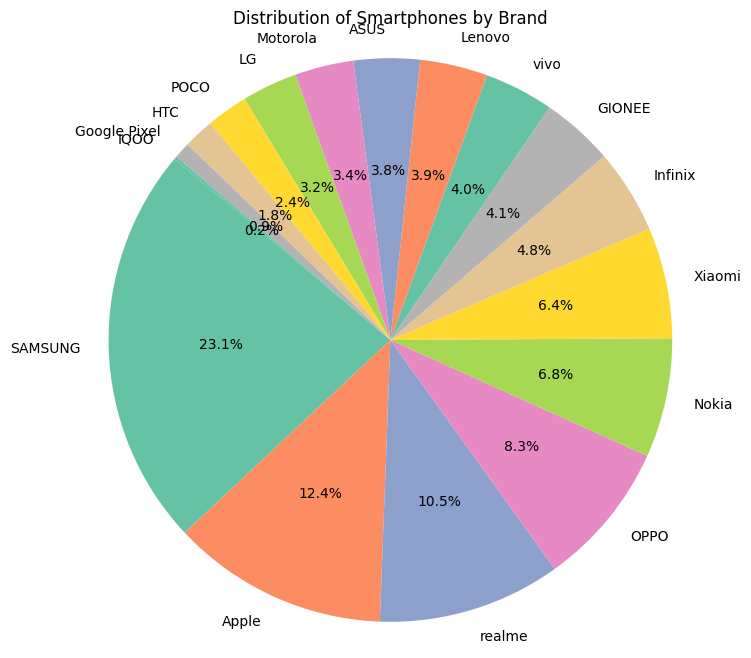

In [ ]:
# Calculating the distribution of smartphones by brand
brand_counts = df['Brands'].value_counts()
# Creating a pie chart for better visualisation
plt.figure(figsize=(8, 8))
palette = sns.color_palette('Set2', len(brand_counts))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Distribution of Smartphones by Brand')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

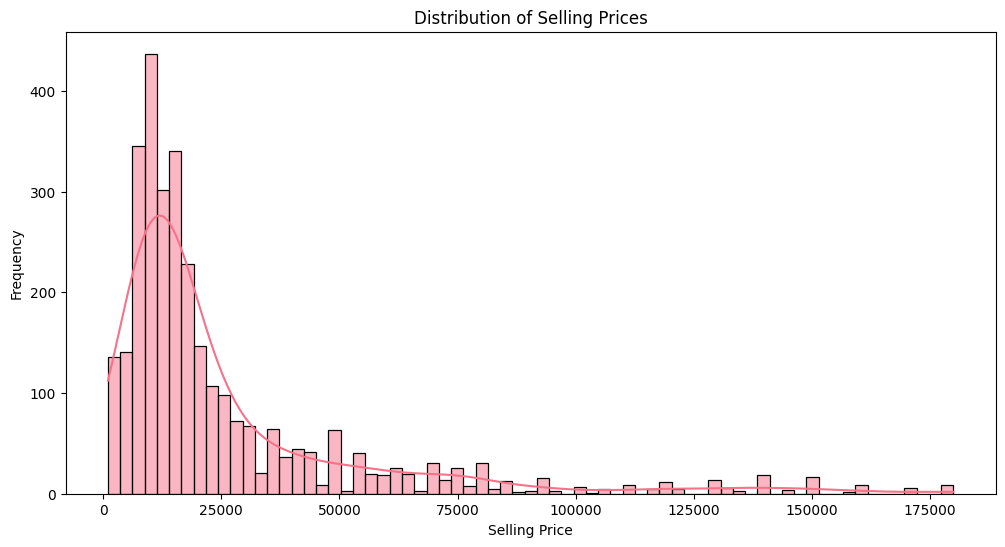

In [ ]:
# Visualizing the data by Histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['Selling Price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

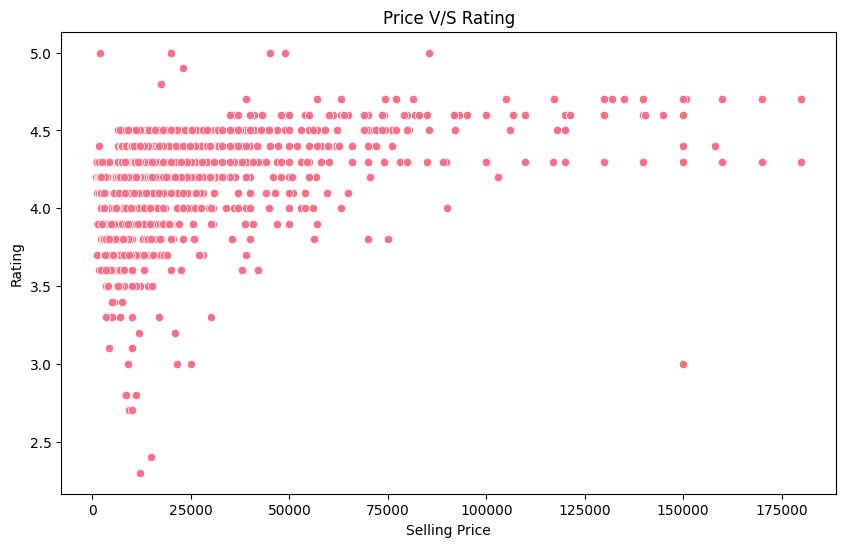

In [ ]:
# Visualizing the data by Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Selling Price', y='Rating', data=df)
plt.title('Price V/S Rating')
plt.xlabel('Selling Price')
plt.ylabel('Rating')
plt.show()

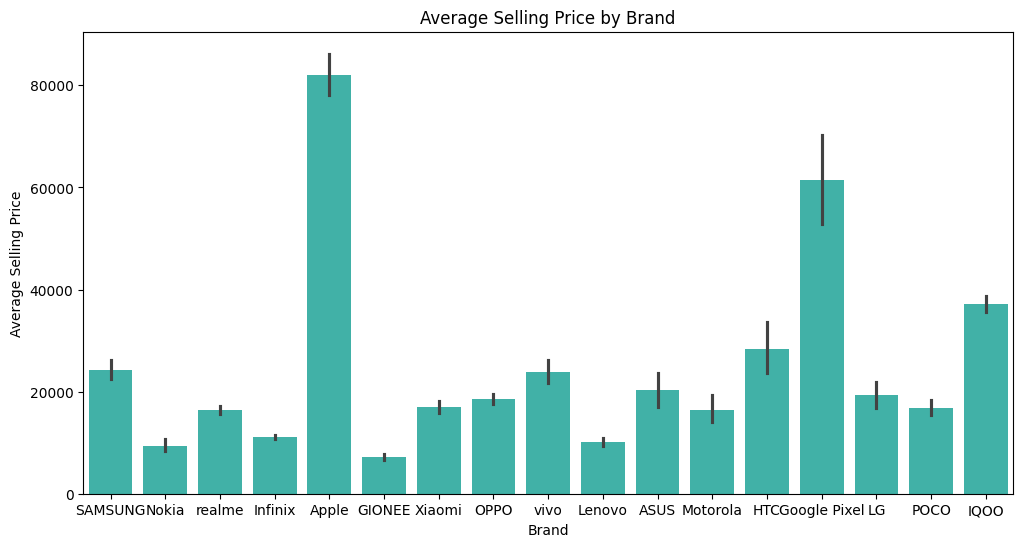

In [ ]:
# Visualizing the data by Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Brands', y='Selling Price',data=df, estimator='mean',color="#2ec4b6")
plt.title('Average Selling Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Selling Price')
plt.show()

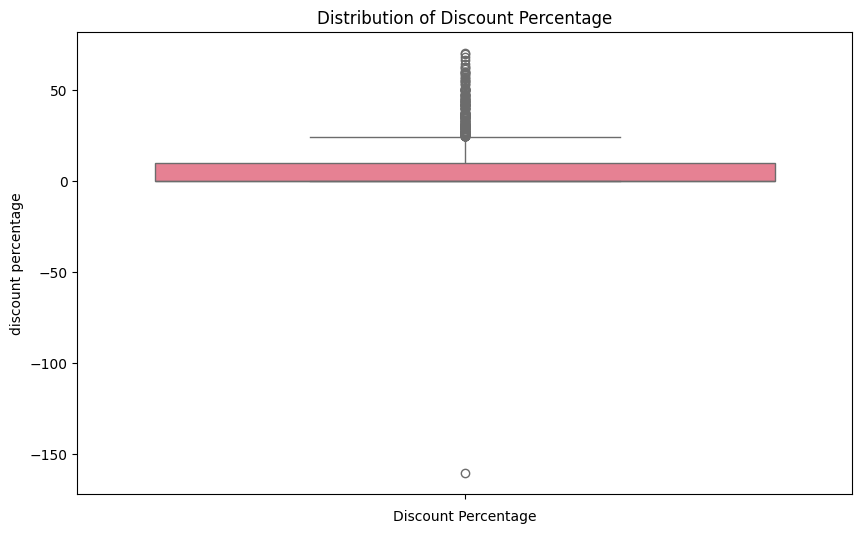

In [ ]:
#Visualising the data using box plot
plt.figure(figsize=(10, 6))
sns.boxplot(y='discount percentage', data=df)
plt.title('Distribution of Discount Percentage')
plt.xlabel('Discount Percentage')
plt.show()

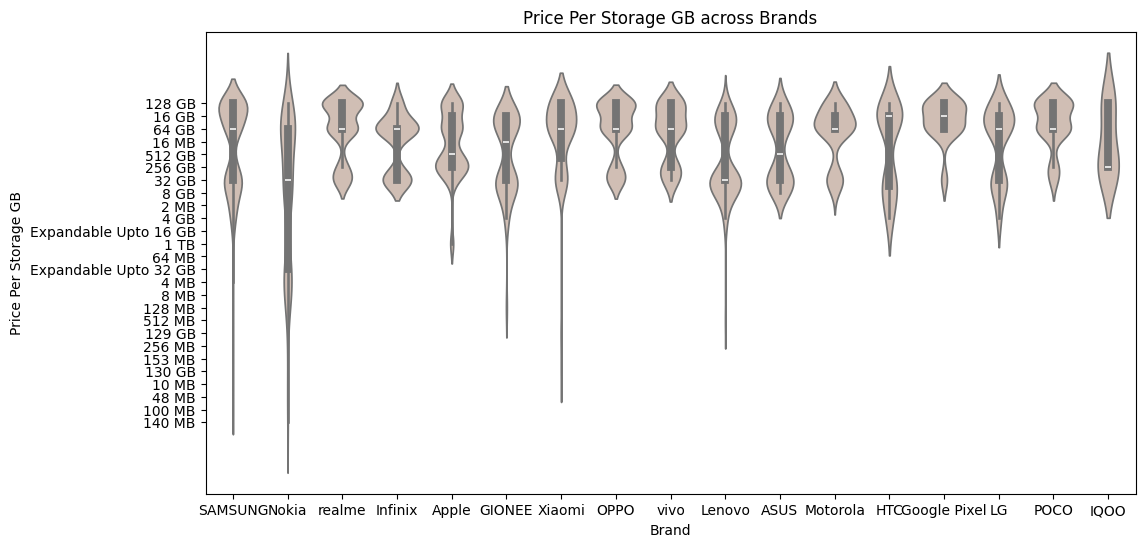

In [ ]:
#Visualising data using violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='Brands', y='Storage', data=df,color="#d5bdaf")
plt.title('Price Per Storage GB across Brands')
plt.xlabel('Brand')
plt.ylabel('Price Per Storage GB')
plt.show()

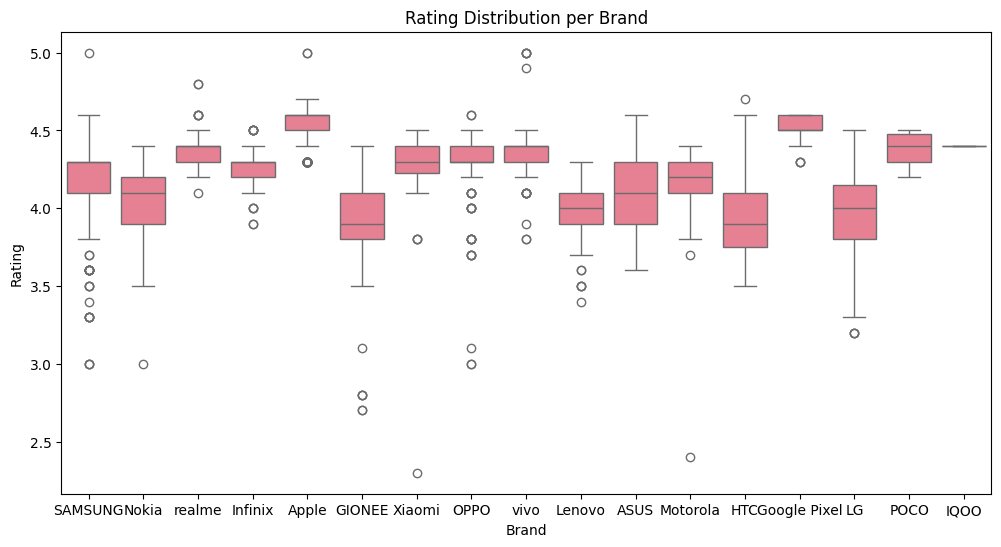

In [ ]:
#Visualising the data using Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brands', y='Rating', data=df)
plt.title('Rating Distribution per Brand')
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.show()

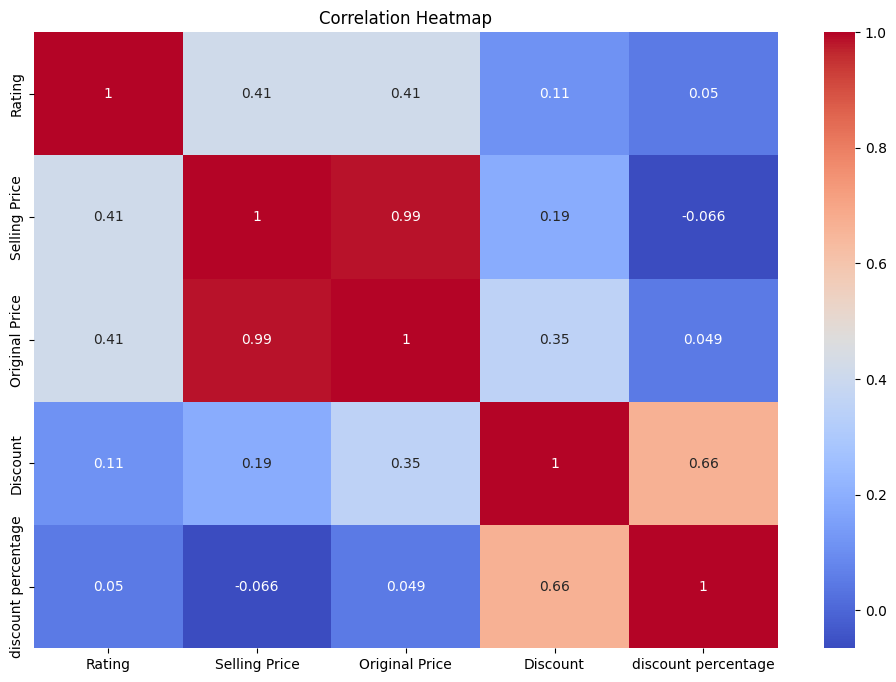

In [ ]:
#Visualising the data using Heatmap
plt.figure(figsize=(12, 8))
# Selecting only numeric columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

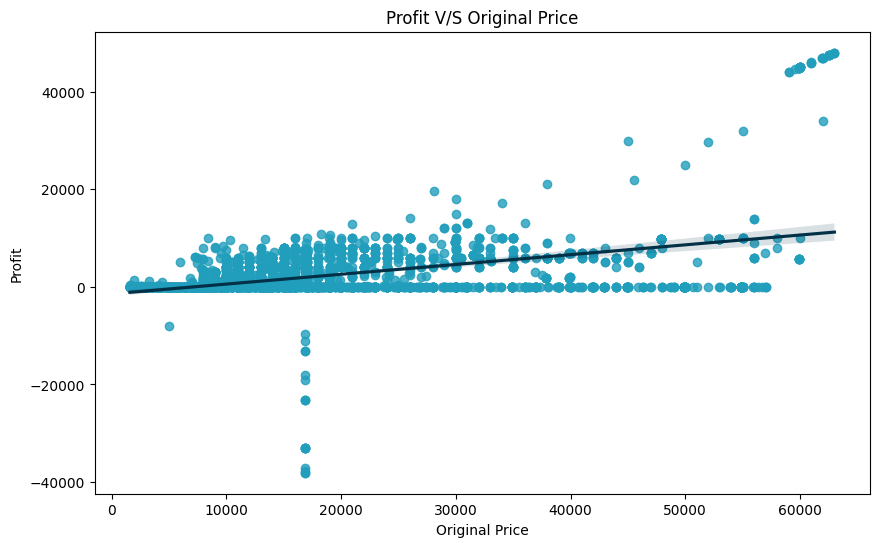

In [ ]:
#Visualising the data using Scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Original Price', y='Profit', data=new_df,color="#219ebc",line_kws=dict(color="#023047"),
)
plt.title('Profit V/S Original Price')
plt.xlabel('Original Price')
plt.ylabel('Profit')
plt.show()